# Setup

In [20]:
!pip install yfinance plotly mplfinance --quiet

import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

In [21]:
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)

# 1.1

In [23]:

def download_flat_yf(ticker, start, end):
    data = yf.download(ticker, start=start, end=end, progress=False)
    data = data.xs(ticker, axis=1, level=1)
    data.columns.name = None
    return data

stock_symbol = 'AAPL'
data = download_flat_yf(stock_symbol, start='2022-01-01', end='2023-01-01')
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,178.645615,179.499543,174.425110,174.542887,104487900
2022-01-04,176.378342,179.558457,175.809061,179.254190,99310400
2022-01-05,171.686707,176.839663,171.411883,176.290017,94537600
2022-01-06,168.820648,172.059652,168.467302,169.507706,96904000
2022-01-07,168.987518,170.921105,167.868591,169.694211,86709100


In [24]:
for i in data:
  print(sum(data[i].isnull())," missing values in ",i)

0  missing values in  Close
0  missing values in  High
0  missing values in  Low
0  missing values in  Open
0  missing values in  Volume


No missing values in any column, data read properly, no need for cleaning.  Datetime indexing is already present.

# 1.2

In [26]:
fig = go.Figure(data=[
    go.Candlestick(x=data.index,
                   open=data['Open'],
                   high=data['High'],
                   low=data['Low'],
                   close=data['Close'])
              ])
fig.update_layout(title=f"Candlestick Chart - {stock_symbol}", xaxis_title='Date', yaxis_title='Price')
fig.show()

In [31]:
fig = go.Figure(data=[
    go.Candlestick(x=data.index,
                   open=data['Open'],
                   high=data['High'],
                   low=data['Low'],
                   close=data['Close'])
              ])
fig.update_layout()
fig.update_layout(
    title=f"Candlestick Chart - {stock_symbol}", xaxis_title='Date', yaxis_title='Price',
    shapes = [dict(
        x0='2022-03-15', x1='2022-03-15', y0=0, y1=1, xref='x', yref='paper',
        line_width=2),
              dict(
        x0='2022-06-21', x1='2022-06-21', y0=0, y1=1, xref='x', yref='paper',
        line_width=2),
              dict(
        x0='2022-11-02', x1='2022-11-02', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],

    annotations=[dict(
        x='2022-03-15', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Trend Reversal'),
                 dict(
        x='2022-06-21', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Trend Reversal'),
                 dict(
        x='2022-11-02', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Sudden Drop')]
)
fig.show()

1.   **Trend Reversal in Mid March:** Prospects for scaling back the war in Ukraine [boosted risk sentiment](https://www.bloomberg.com/news/articles/2022-03-28/u-s-stock-rally-oil-slide-may-give-asia-tailwind-markets-wrap). Talks between Russia and Ukraine offered a potential pathway to a meeting between Vladimir Putin and Volodymyr Zelenskiy. Russia cut back military activity near the capital Kyiv and the city of Chernihiv, and share prices across almost all sectors increased in the US markets, Apple included.

2.   **Trend Reversal in June end:** Apple announced financial [results](https://www.apple.com/newsroom/2022/07/apple-reports-third-quarter-results/) for its fiscal 2022 third quarter ended June 25, 2022. The Company posted a June quarter revenue record of \$83.0 billion, up 2 percent year over year, and quarterly earnings per diluted share of $1.20. This positive report must have fueled the trend reversal, raising stock prices. Before this, the share price was falling with the general [US market trend](https://finance.yahoo.com/news/stock-market-news-live-updates-june-30-22-115133813.html), due to high inflation and speculation of recession.

3. **Sudden drop in November 2022:** On searching about this, I found that this week was one of the bigger hits to the Apple share prices in recent times. I referred to this [article](https://www.barrons.com/articles/apple-stock-price-iphone-51669659444) that stated "The decline in Apple stock can be blamed on many things: problems at its factories in China, less demand for its new iPhone 14 than expected, and investors’ distaste for Big Tech."

# 2.1

In [32]:
data['Daily Return'] = data['Close'].pct_change()
data['Log Return'] = np.log(data['Close'] / data['Close'].shift(1))
data[['Daily Return', 'Log Return']].dropna().head()

,Daily Return,Log Return
Date,,
2022-01-04,-0.012691,-0.012773
2022-01-05,-0.026600,-0.026960
2022-01-06,-0.016694,-0.016834
2022-01-07,0.000988,0.000988
2022-01-10,0.000116,0.000116


In [38]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Line(x=data['Daily Return'].index, y=data['Daily Return']),
    row=1, col=1
)

fig.add_trace(
    go.Line(x=data['Log Return'].index, y=data['Log Return']),
    row=1, col=2
)

fig.update_layout(height=600, width=1500, title_text="Daily (blue) vs. Log (red) Returns")
fig.show()

Simple Return: (P_t - P_{t-1}) / P_{t-1}

Log Return: log(P_t / P_{t-1})

Let the value of the simple return be x, then note that the value of log return is simply log(1+x). Now we know that limit log(1+x)/x tends to 1 as x tends to 0, which means that for small values of x close to 0, log(1+x) is approximately equal to x. Since share prices usually move only by a small percentage in a day, log return is approximately equal to the simple return, and so the plots look similar. Also note that log(1+x) is an increasing function in x. So, when simple return rises, log return rises too. Thus they reflect each others' movements.

They may differ significantly when x is not very close to zero, that is, on days when the return is exceptionally large (negative or positive). So, on the days when the consecutive closing prices vary by a lot, significant difference will be noticed between simple and log returns. This can be noticed in the graph below, the peaks of the plotted difference correspond to the peaks in the other two graphs as well.

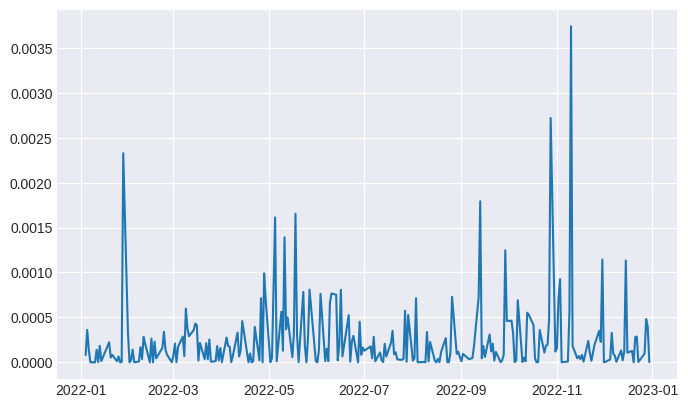

In [76]:
f = plt.figure()
f.set_figwidth(8)
plt.plot(data['Daily Return'].index,data['Daily Return']-data['Log Return'])

# 2.2

In [43]:
data['Volatility']=data['Daily Return'].rolling(14).std()
data[['Volatility']].dropna().head()

,Volatility
Date,
2022-01-24,0.012197
2022-01-25,0.012167
2022-01-26,0.011095
2022-01-27,0.010719
2022-01-28,0.022825


In [48]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(
    go.Line(x=data['Close'].index, y=data['Close']),
    row=1, col=1
)

fig.add_trace(
    go.Line(x=data['Volatility'].index, y=data['Volatility']),
    row=2, col=1
)

fig.update_layout(height=600, width=1500, title_text="Closing Price (blue) vs. Volatility (red)")
fig.show()

# 3.1

In [50]:
from scipy.stats import binom
data['Win']=data['Daily Return']>0
data.head()

,Close,High,Low,Open,Volume,Daily Return,Log Return,Volatility,Win
Date,,,,,,,,,
2022-01-03,178.645615,179.499543,174.425110,174.542887,104487900,NaN,NaN,NaN,False
2022-01-04,176.378342,179.558457,175.809061,179.254190,99310400,-0.012691,-0.012773,NaN,False
2022-01-05,171.686707,176.839663,171.411883,176.290017,94537600,-0.026600,-0.026960,NaN,False
2022-01-06,168.820648,172.059652,168.467302,169.507706,96904000,-0.016694,-0.016834,NaN,False
2022-01-07,168.987518,170.921105,167.868591,169.694211,86709100,0.000988,0.000988,NaN,True


In [80]:
P_up=data['Win'].sum()/(len(data['Win'])-1)
print("Value of P(UP) is ",P_up*100,"%")

Value of P(UP) is  46.800000000000004 %


In [57]:
from scipy.stats import binom
n=10
p=0.6
rv=binom(n,p)
print("Theoretical probability of exactly 6 heads: ",rv.pmf(6))
print("Theoretical probability of at least 8 heads: ",1-rv.cdf(7))
rvs=rv.rvs(size=1000)
print("Emperical probability of exactly 6 heads: ",(rvs==6).sum()/1000)
print("Emperical probability of at least 8 heads: ",(rvs>7).sum()/1000)

Theoretical probability of exactly 6 heads:  0.2508226559999998
Theoretical probability of at least 8 heads:  0.16728975359999998
Emperical probability of exactly 6 heads:  0.246
Emperical probability of at least 8 heads:  0.163


Win True means Up and Win False means Down.

The theoretical values are calculated using the PMF and CDF values of the Binomial Distribution.

The emperical values obtained from 1000 trials for both the cases is roughly equal to the theoretical values.

# 3.2

In [66]:
avg_win=data['Log Return'][data['Win']].mean()
avg_loss=data['Log Return'][data['Win']==False].mean()
print("Average win %: ",avg_win*100,"%")
print("Average loss %: ",avg_loss*100,"%")
print("Expected earning from 6 wins and 4 losses = ",(6*avg_win+4*avg_loss)*100,"%")

Average win %:  1.7099915073716727 %
Average loss %:  -1.7533598982966514 %
Expected earning from 6 wins and 4 losses =  3.2465094510434307 %


In [72]:
data['RecentWins']=data['Win'].rolling(10).sum()
data['RecentReturns']=data['Log Return'].rolling(10).sum()
data.head(15)

,Close,High,Low,Open,Volume,Daily Return,Log Return,Volatility,Win,RecentWins,RecentReturns
Date,,,,,,,,,,,
2022-01-03,178.645615,179.499543,174.425110,174.542887,104487900,NaN,NaN,NaN,False,NaN,NaN
2022-01-04,176.378342,179.558457,175.809061,179.254190,99310400,-0.012691,-0.012773,NaN,False,NaN,NaN
2022-01-05,171.686707,176.839663,171.411883,176.290017,94537600,-0.026600,-0.026960,NaN,False,NaN,NaN
2022-01-06,168.820648,172.059652,168.467302,169.507706,96904000,-0.016694,-0.016834,NaN,False,NaN,NaN
2022-01-07,168.987518,170.921105,167.868591,169.694211,86709100,0.000988,0.000988,NaN,True,NaN,NaN
2022-01-10,169.007172,169.311439,165.061475,165.954658,106765600,0.000116,0.000116,NaN,True,NaN,NaN
2022-01-11,171.843750,171.941893,167.662499,169.134772,76138300,0.016784,0.016644,NaN,True,NaN,NaN
2022-01-12,172.285431,173.904926,171.588563,172.864522,74805200,0.002570,0.002567,NaN,True,NaN,NaN
2022-01-13,169.007172,173.355279,168.614556,172.530809,84505800,-0.019028,-0.019211,NaN,False,NaN,NaN


In [70]:
data_filt=data[data['RecentWins']==6]
count=len(data_filt['RecentWins'])
profit_count=(data_filt['RecentReturns']>0).sum()
profit_pc = 100*profit_count/count
print("Out of all the 10 day windows in the year with 6 wins and 4 losses, only", profit_pc,"% were profitable.")

Out of all the 10 day windows in the year with 6 wins and 4 losses, only 84.21052631578948 % were profitable.


So, even in the 10 day windows with 6 wins (more ups than downs), around 16% resulted in a net loss over the time period, despite having a positive expected return. This proves the required statement.

# 3.3

In [71]:
print("Expected Return = ",P_up*100-(1-P_up)*150)

Expected Return =  -33.00000000000001


Let h be a function on x from {up,down} to {100,-150}, where h(up)=100, h(down)=-150

Thus h(x) denotes the return we would get in the situation defined in the problem depending on whether the stock moves up or down.

To calculate: E(h(x))

= ∑h(x)ℙ(x)

= h(up)\*ℙ(up) + h(down)\*ℙ(down) = P_up\*100 - (1-P_up)\*150 = -33

Therefore, a loss of Rs. 33 is to be expected in this bet. So, I would not take it as it would likely cause me to lose money.